In [240]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Apertura e lettura del file

In [241]:
# Apertura e lettura del file
#file = open("data.txt","r")
#data = file.read()

df = pd.read_table('data.txt', sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,6,5,3,2,2,7,4,10,3,9,3,8,2,8,12
1,4,7,6,5,12,4,3,7,13,11,11,10,10,9,9,8,13,13
2,3,2,1,6,4,9,2,5,7,6,4,1,2,3,2,6,3,3


##### Divisione dei dati letti in input e creazione delle liste contenenti i nodi e i pesi relativi

La prima riga rappresenta il nodo di partenza di ogni arco, la seconda il node di arrivo e la terza il peso di ogni arco

In [242]:
# Divisione del file nelle tre righe di dati
#lista = data.split("\n")

# parsing in lista di interi
#da = [int(i) for i in lista[0].split(', ')]
#a = [int(i) for i in lista[1].split(', ')]
#pesi = [int(i) for i in lista[2].split(', ')]


da = df[0:1]
a = df[1:2]
pesi = df[2:3]


##### Generazione del grafo

In [243]:
#g = nx.Graph()

#for i in range(len(da)):
#     g.add_edge(da[i],a[i], weight=pesi[i])
    
#nx.draw_planar(g, with_labels = True)
#plt.savefig("prova.png")

In [244]:
# Creation of the graph
G = nx.Graph()

# Extract the nodes from the lists of edges and sort them
nodes = pd.unique(pd.concat([df.loc[0],df.loc[1]]))
nodes.sort()

for i in nodes:
    G.add_node(i)
    
for i in range(da.size):
    G.add_edge(df.iat[0,i], df.iat[1,i], weight=df.iat[2,i])

{(1, 4): Text(-0.30376727719653784, -0.1677453547588343, '3'),
 (1, 7): Text(-0.0790943667744828, 0.14150956076185006, '2'),
 (1, 6): Text(-0.3445615452049803, 0.4577237286637392, '1'),
 (2, 3): Text(0.09982626099628256, -0.2882785619380826, '2'),
 (2, 7): Text(0.1960280987791485, 0.04899332301743189, '5'),
 (2, 8): Text(0.3492188393400568, -0.08840410132795667, '6'),
 (3, 4): Text(-0.16891767389241155, -0.4533018210708626, '9'),
 (3, 10): Text(-0.05830095058431822, -0.6891929149838323, '1'),
 (3, 9): Text(0.11462829427771204, -0.5391701783227816, '3'),
 (4, 11): Text(-0.3247333005531261, -0.5851627515640814, '6'),
 (5, 6): Text(-0.2690351509115988, 0.9128266576045573, '6'),
 (5, 12): Text(0.0004573654695990831, 0.9158230954423856, '4'),
 (7, 13): Text(0.24306799662844536, 0.2877237268396812, '7'),
 (8, 9): Text(0.3640208726214863, -0.33929571771265565, '2'),
 (8, 13): Text(0.39625873718935367, 0.15032630249429266, '3'),
 (9, 10): Text(0.09677394494661629, -0.7470443028009213, '2'),
 (

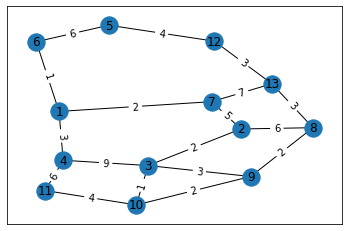

In [245]:
#nx.draw_planar(G, with_labels=True)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [246]:
#mDist = dict(nx.all_pairs_shortest_path_length(G ))
dictDist= dict(nx.all_pairs_dijkstra_path_length(G))

In [250]:
mDist = pd.DataFrame(dictDist)
mDist.sort_index()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,0,7,9,3,7,1,2,12,12,10,9,11,9
2,7,0,2,10,14,8,5,6,5,3,7,12,9
3,9,2,0,9,15,10,7,5,3,1,5,11,8
4,3,10,9,0,10,4,5,14,12,10,6,14,12
5,7,14,15,10,0,6,9,10,12,14,16,4,7
6,1,8,10,4,6,0,3,13,13,11,10,10,10
7,2,5,7,5,9,3,0,10,10,8,11,10,7
8,12,6,5,14,10,13,10,0,2,4,8,6,3
9,12,5,3,12,12,13,10,2,0,2,6,8,5
10,10,3,1,10,14,11,8,4,2,0,4,10,7
